In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

pd.set_option('precision', 2)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
data_folder = "../data"
web_data = "web_page_data.csv"

In [3]:
session_times = pd.read_csv(Path(data_folder) / web_data)
session_times.loc[:, 'Time'] *= 100.

In [4]:
session_times.tail()

,Page,Time
31,Page A,74.0
32,Page A,86.0
33,Page A,118.0
34,Page A,206.0
35,Page A,93.0


Text(0, 0.5, '时间（秒）')

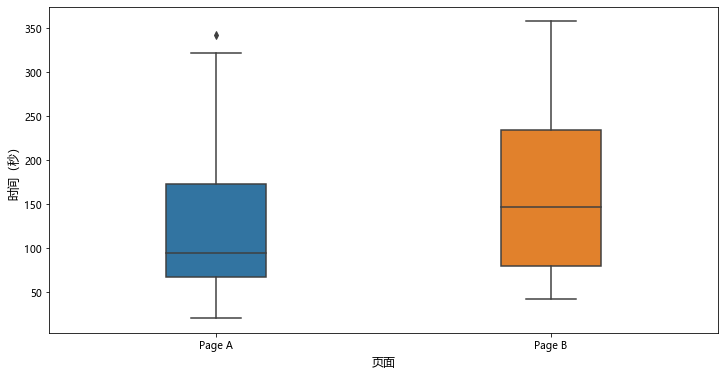

In [5]:
# Figure 3.3

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Page', y='Time', data=session_times, width=0.3, ax=ax)
ax.set_xlabel('页面', fontsize=12)
ax.set_ylabel('时间（秒）', fontsize=12)

In [63]:
def permutation(arr, n1, n2):
    n = n1 + n2
    np.random.shuffle(arr)
    return arr[:n1], arr[n1:]

In [64]:
info_table = session_times.groupby('Page').agg(['count', 'mean'])
mean_diff = info_table.loc['Page B', ('Time', 'mean')] - info_table.loc['Page A', ('Time', 'mean')]

n_perm = 10000
session_values = session_times['Time'].values
n_A = int(info_table.loc['Page A', ('Time', 'count')])
n_B = int(info_table.loc['Page B', ('Time', 'count')])

sampled_mean_diff = []
for _ in range(n_perm):
    perm_A, perm_B = permutation(session_values, n_A, n_B)
    mean_diff_perm = np.mean(perm_B) - np.mean(perm_A)
    sampled_mean_diff.append(mean_diff_perm)

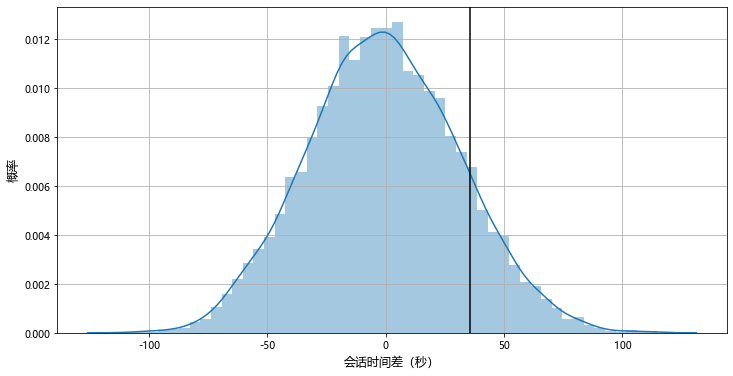

In [65]:
# Figure 3.4

fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(sampled_mean_diff, bins=50, ax=ax)
ax.set_xlabel('会话时间差（秒）', fontsize=12)
ax.set_ylabel('概率', fontsize=12)
ax.axvline(mean_diff, color='k')
plt.grid()

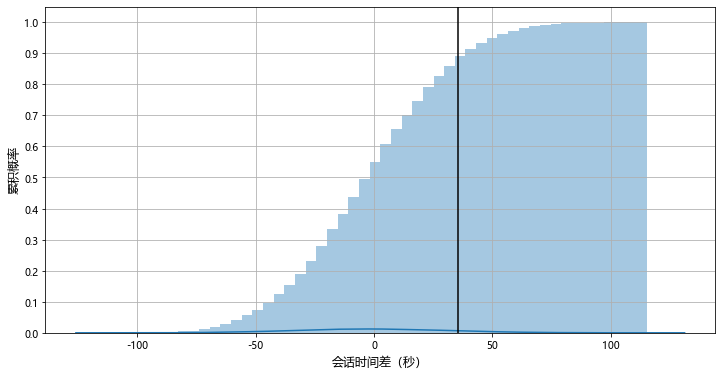

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(sampled_mean_diff, bins=50, hist_kws={'cumulative': True}, ax=ax)
ax.set_xlabel('会话时间差（秒）', fontsize=12)
ax.set_ylabel('累积概率', fontsize=12)
ax.set_yticks(np.linspace(0., 1., 11))
ax.axvline(mean_diff, color='k')
plt.grid()

In [67]:
n_A = 22588
n_B = 23739
cn_A = 182
cn_B = 200

conversion_rate_A = cn_A / n_A * 100.
conversion_rate_B = cn_B / n_B * 100.
conversion_rate_diff = conversion_rate_B - conversion_rate_A

print(f"页面A的转化率: {conversion_rate_A:.2f}%")
print(f"页面B的转化率: {conversion_rate_B:.2f}%")
print(f"页面转化率变化: {conversion_rate_diff :.2f}%")

页面A的转化率: 0.81%
页面B的转化率: 0.84%
页面转化率变化: 0.04%


In [68]:
n_perm = 5000
sampled_conversion_diff = []
num_un_converted = n_A + n_B - cn_A - cn_B
num_converted = cn_A + cn_B
conversion_values = np.concatenate([np.zeros(num_un_converted), np.ones(num_converted)])
for _ in range(n_perm):
    perm_A, perm_B = permutation(conversion_values, n_A, n_B)
    mean_conversion_perm = np.mean(perm_B) * 100. - np.mean(perm_A) * 100.
    sampled_conversion_diff.append(mean_conversion_perm)

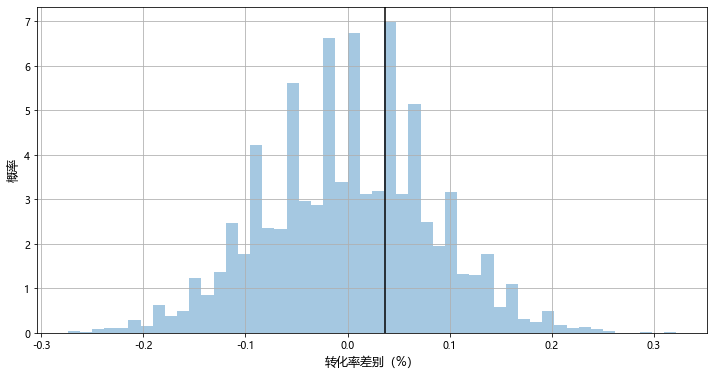

In [69]:
# Figure 3.5

fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(sampled_conversion_diff, norm_hist=True, bins=50, kde=False, ax=ax)
ax.set_xlabel('转化率差别（%）', fontsize=12)
ax.set_ylabel('概率', fontsize=12)
ax.axvline(conversion_rate_diff, color='k')
plt.grid()

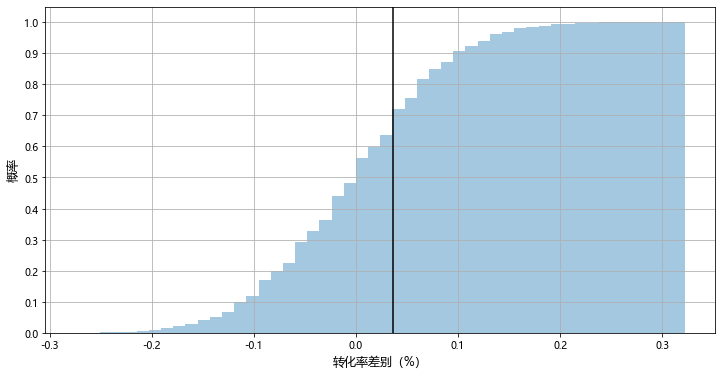

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(sampled_conversion_diff, norm_hist=True, bins=50, hist_kws={'cumulative': True}, kde=False, ax=ax)
ax.set_xlabel('转化率差别（%）', fontsize=12)
ax.set_ylabel('概率', fontsize=12)
ax.set_yticks(np.linspace(0., 1., 11))
ax.axvline(conversion_rate_diff, color='k')
plt.grid()

# of samples: 46327; Q.: 0.6474
# of samples: 92654; Q.: 0.7098
# of samples: 185308; Q.: 0.8054
# of samples: 370616; Q.: 0.8908
# of samples: 741232; Q.: 0.9598


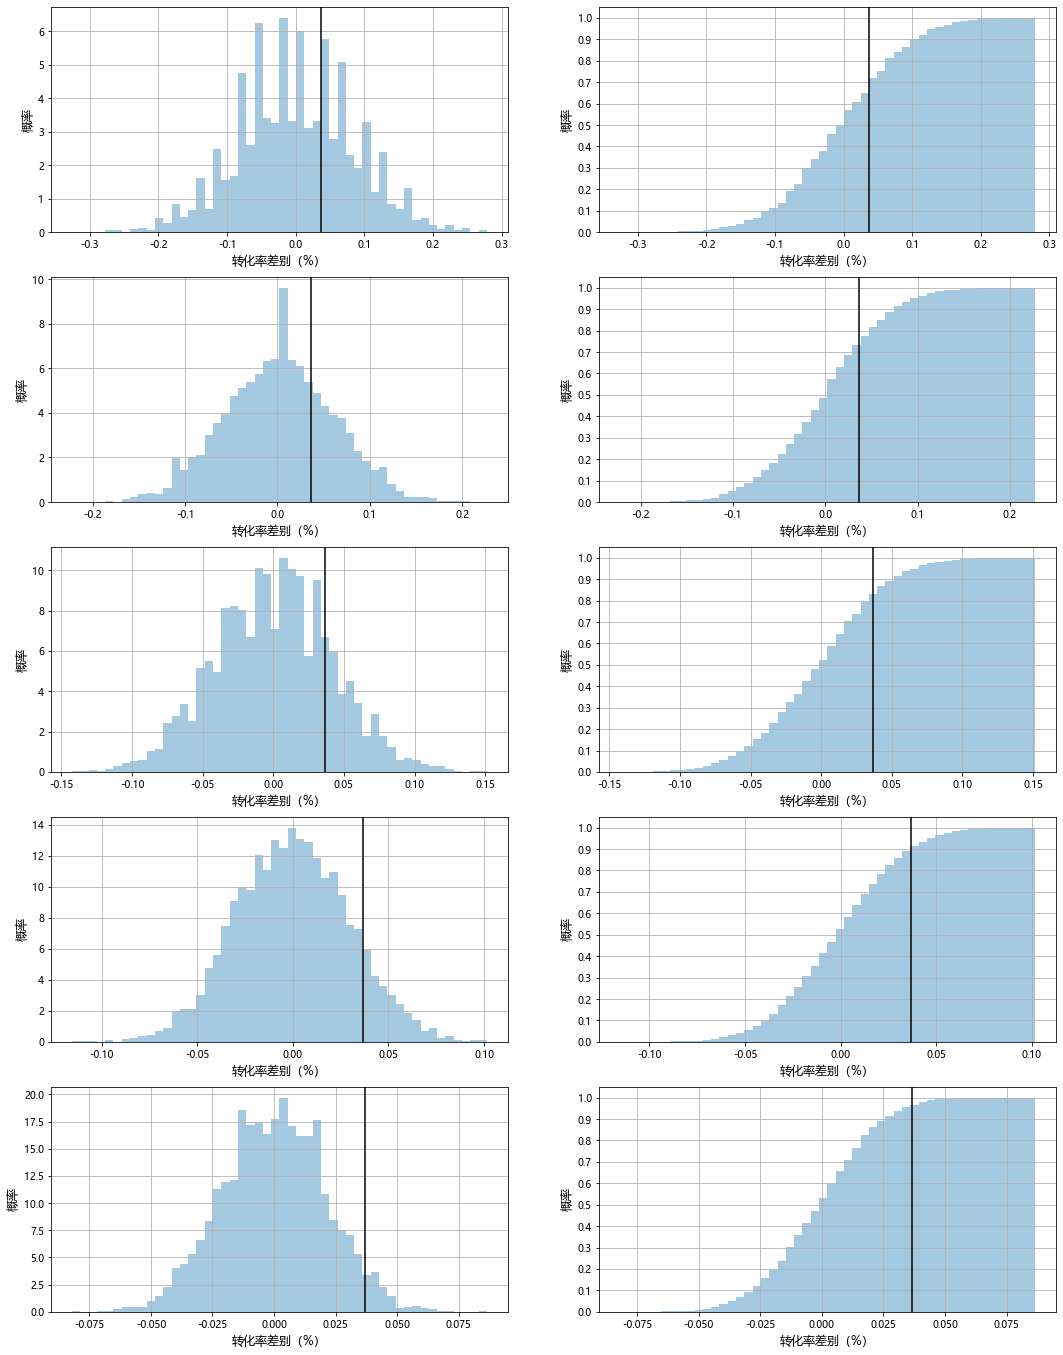

In [96]:
num_fold = 6
num_un_converted = n_A + n_B - cn_A - cn_B
num_converted = cn_A + cn_B
conversion_values = np.concatenate([np.zeros(num_un_converted), np.ones(num_converted)])

fig, axes = plt.subplots(nrows=num_fold, ncols=2, figsize=(18, 24))

for i in range(num_fold):
    n_perm = 50000
    sampled_conversion_diff = []
    factor = 2 ** i
    new_num_un_converted = num_un_converted * factor
    new_num_converted = num_converted * factor
    new_n_A = n_A * factor
    new_n_B = n_B * factor
    conversion_values = np.concatenate([np.zeros(new_num_un_converted), np.ones(new_num_converted)])
    for _ in range(n_perm):
        perm_A, perm_B = permutation(conversion_values, new_n_A, new_n_B)
        mean_conversion_perm = np.mean(perm_B) * 100. - np.mean(perm_A) * 100.
        sampled_conversion_diff.append(mean_conversion_perm)
        
    ax = axes[i, 0]
    sns.distplot(sampled_conversion_diff, norm_hist=True, bins=50, kde=False, ax=ax)
    ax.set_xlabel('转化率差别（%）', fontsize=12)
    ax.set_ylabel('概率', fontsize=12)
    ax.axvline(conversion_rate_diff, color='k')
    ax.grid()
    
    ax = axes[i, 1]
    sns.distplot(sampled_conversion_diff, norm_hist=True, bins=50, hist_kws={'cumulative': True}, kde=False, ax=ax)
    ax.set_xlabel('转化率差别（%）', fontsize=12)
    ax.set_ylabel('概率', fontsize=12)
    ax.set_yticks(np.linspace(0., 1., 11))
    ax.axvline(conversion_rate_diff, color='k')
    ax.grid()
    
    print(f"# of samples: {new_num_un_converted + new_num_converted}; Q.: {sum(conversion_rate_diff > np.array(sampled_conversion_diff)) / len(sampled_conversion_diff)}")

In [94]:
sum(conversion_rate_diff > np.array(sampled_conversion_diff)) / len(sampled_conversion_diff)
#sorted(sampled_conversion_diff)

1.0

In [93]:
sum(conversion_rate_diff < np.array(sampled_conversion_diff))

0